# LOADING IMAGE

In [1]:
import src.features.build_features as pp
from src.visualization.visualize import *

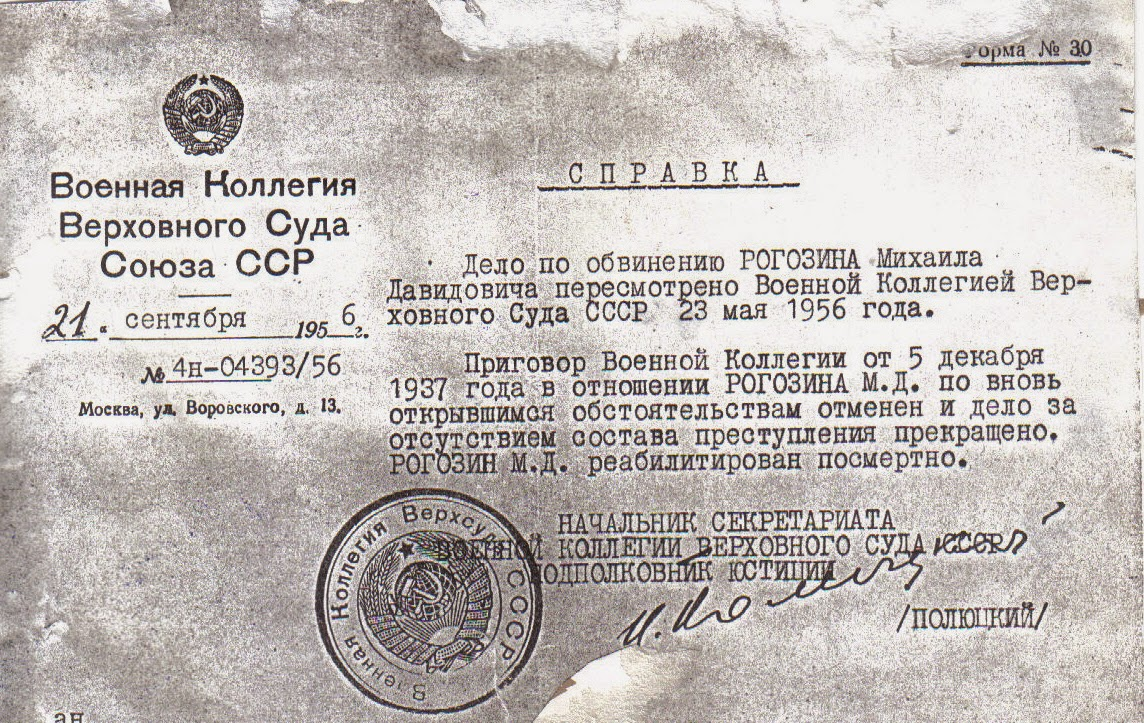

In [2]:
url = '../data/raw/example.jpg'
image = pp.open_image(url)
image

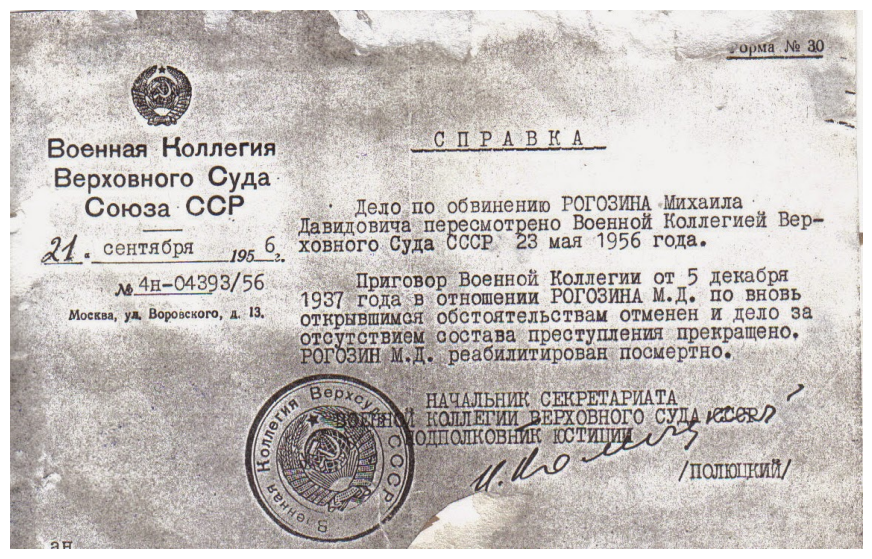

In [3]:
def preprocessing(image):
    image = pp.cut_image(image)
    image = pp.grayscale(image)
    image = pp.pil_to_numpy(image)
    image = pp.denoising(image)
    image = pp.contrast_enhancement(image)
    image = pp.adaptive_threshold(image, block_size=51, c_var = 40)

    return image

# image = preprocessing(image)
show(image)

# USING OCR

In [4]:
from models.mmocr.model import MMOCR

In [5]:
det='DBNet'
det_weights=r'..\models\mmocr\dbnet\dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth'

rec='SAR'
rec_config = r'..\models\mmocr\config.py'
rec_weights=r'..\models\mmocr\sar\epoch_10.pth'

In [9]:
# Load models into memory
ocr = MMOCR(det=det,
            det_weights=det_weights,
            rec=rec_config,
            rec_weights=rec_weights,
            device='cuda')

['.gitkeep', '.ipynb_checkpoints', 'pipeline-mmocr-example.ipynb', 'preprocessing-example.ipynb']
Loads checkpoint by local backend from path: ..\models\mmocr\dbnet\dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth
Loads checkpoint by local backend from path: ..\models\mmocr\sar\epoch_10.pth


In [12]:
# Perform inference
result = ocr(url, return_vis=True)
None

Output()

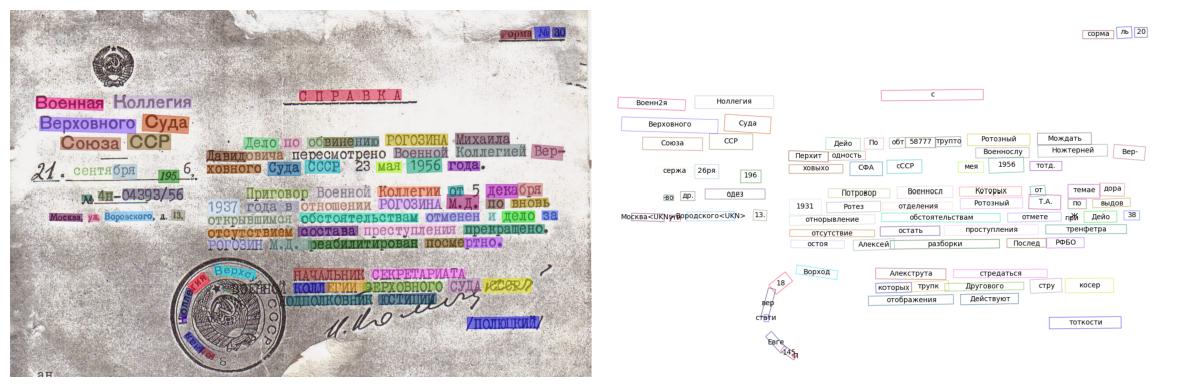

In [14]:
show(result['visualization'][0])